# **DL Lab 6**
## **Name: Soumyadeep Ganguly**
## **Reg No: 24MDT0082**

In [71]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import keras_tuner as kt

## **Question 1**

In [72]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train.shape

(404, 13)

In [73]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [74]:
model = Sequential()
model.add(Flatten(input_shape =(13,)))
model.add(Dense(256, activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(1, activation="linear"))
model.summary()


e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
optimizer = SGD(learning_rate = 0.01, momentum=0.9)
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-5, mode= 'min', patience=10, verbose = 1, restore_best_weights=True)

In [76]:
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=[tf.keras.metrics.R2Score])
hist = model.fit(x_train, y_train, batch_size=64, epochs=500, validation_data=(x_test, y_test), verbose=1, callbacks = [estop])

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 298.8238 - r2_score: -2.7639 - val_loss: 83.0537 - val_r2_score: 0.0023
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 87.7417 - r2_score: -0.0767 - val_loss: 105.8587 - val_r2_score: -0.2717
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 99.9092 - r2_score: -0.0556 - val_loss: 76.2419 - val_r2_score: 0.0841
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 66.4051 - r2_score: 0.2359 - val_loss: 75.8833 - val_r2_score: 0.0884
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 63.3647 - r2_score: 0.2563 - val_loss: 34.1310 - val_r2_score: 0.5900
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 36.0213 - r2_score: 0.5973 - val_loss: 23.9991 - val_r2_score: 0.7117
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.8503 - r2_score: 0.7882 - val_loss: 23.1536 - val_r2_score: 0.7219
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.6799 - r2_score: 0.7870 - val_loss: 2

In [77]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {score[0]}")
print(f"Accuracy: {score[1]}")


Loss: 19.78437042236328
Accuracy: 0.7623322010040283


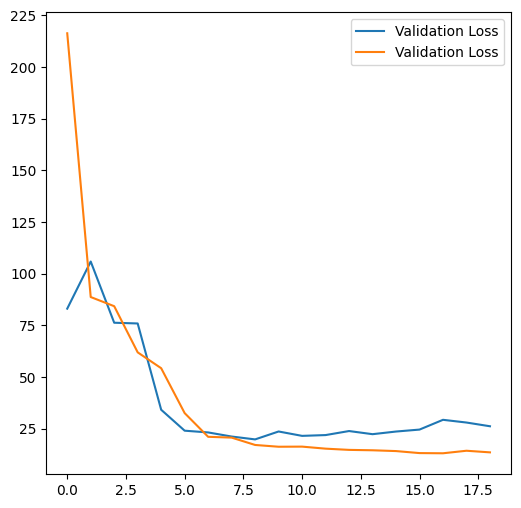

In [78]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(hist.history['val_loss'], label="Validation Loss")
ax.plot(hist.history['loss'], label="Validation Loss")
ax.legend()

## **Question 2**

In [79]:
def build_model(hp):

    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.05])
    momentum = hp.Choice('momentum', values=[0.0, 0.5, 0.9])
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

    model = Sequential()
    model.add(Flatten(input_shape=(13, )))
    units = hp.Int('units', min_value=64, max_value=512, step=64)
    model.add(Dense(units, activation='sigmoid'))
    dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error',
        metrics=[tf.keras.metrics.R2Score(name="r2")]   
    )
    return model


tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective("val_r2", direction="max"),  
    max_trials=10,
    executions_per_trial=1,
    directory='boston_housing_tuning',
    project_name="learning_rate_momentum_comparison"
)

tuner.search(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=128,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)


Trial 10 Complete [00h 00m 02s]
val_r2: -1140.5057373046875

Best val_r2 So Far: 0.8170754909515381
Total elapsed time: 00h 00m 22s


### **Best Parameters**

In [89]:
# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=10)[0]

print("\nBest Hyperparameters found:")
print("Learning Rate:", best_hp.get('learning_rate'))
print("Momentum:", best_hp.get('momentum'))
print("Units:", best_hp.get('units'))
print("Dropout:", best_hp.get('dropout'))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate on test set
test_loss, test_r2 = best_model.evaluate(x_test, y_test, verbose=0)

print(f"\nBest Model Performance on Test Data:")
print(f"Test MSE: {test_loss:.4f}")
print(f"Test R2 Score: {test_r2:.4f}")


Best Hyperparameters found:
Learning Rate: 0.05
Momentum: 0.5
Units: 128
Dropout: 0.2

Best Model Performance on Test Data:
Test MSE: 17.8898
Test R2 Score: 0.7851


## **Question 3**

In [81]:
def build_model_opt(hp):
    optimizer_choice = hp.Choice('optimizer', ['SGD', 'RMSprop', 'Adam'])
    if optimizer_choice == 'SGD':
        optimizer = SGD(
            learning_rate = hp.Choice('lr', [1e-2, 1e-3, 1e-4]),
            momentum = hp.Choice('momentum', [0.8, 0.9, 0.95, 0.99])
        )
    elif optimizer_choice == "RMSprop":
        optimizer = RMSprop(
            learning_rate = hp.Choice('lr_rms', [1e-2, 1e-3, 1e-4])
        )
    else:
        optimizer = Adam(
            learning_rate = hp.Choice('lr_adam', [1e-2, 1e-3, 1e-4])
        )
    

    model = Sequential()
    model.add(Flatten(input_shape=(13, )))
    units = hp.Int('units', min_value=64, max_value=512, step=64)
    model.add(Dense(units, activation='sigmoid'))
    dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error',
        metrics=[tf.keras.metrics.R2Score(name="r2")]   
    )
    return model


tuner2 = kt.RandomSearch(
    build_model_opt,
    objective=kt.Objective("val_r2", direction="max"),  
    max_trials=10,
    executions_per_trial=1,
    directory='boston_housing_tuning',
    project_name="optimizer_comparison"
)

tuner2.search(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=128,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Trial 10 Complete [00h 00m 02s]
val_r2: 0.64320969581604

Best val_r2 So Far: 0.64320969581604
Total elapsed time: 00h 00m 23s


### **Best Optimizer**

In [90]:
best_hp = tuner2.get_best_hyperparameters(num_trials=10)[0]

print("\nBest Hyperparameters found:")
print("Optimizer:", best_hp.get('optimizer'))
print("Units:", best_hp.get('units'))
print("Dropout:", best_hp.get('dropout'))

if best_hp.get('optimizer') == 'SGD':
    print("Learning Rate:", best_hp.get('lr'))
    print("Momentum:", best_hp.get('momentum'))
elif best_hp.get('optimizer') == 'RMSprop':
    print("Learning Rate:", best_hp.get('lr_rms'))
elif best_hp.get('optimizer') == 'Adam':
    print("Learning Rate:", best_hp.get('lr_adam'))

best_model = tuner2.get_best_models(num_models=1)[0]
test_loss, test_r2 = best_model.evaluate(x_test, y_test, verbose=0)

print(f"\nBest Model Performance on Test Data:")
print(f"Test MSE: {test_loss:.4f}")
print(f"Test R2 Score: {test_r2:.4f}")


Best Hyperparameters found:
Optimizer: Adam
Units: 320
Dropout: 0.0
Learning Rate: 0.01

Best Model Performance on Test Data:
Test MSE: 25.6011
Test R2 Score: 0.6925
